# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [6]:
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [7]:
print(df_hh_income.isna().sum())
print(df_pct_poverty.isna().sum())
print(df_pct_completed_hs.isna().sum())
print(df_share_race_city.isna().sum())
print(df_fatalities.isna().sum())

Geographic Area     0
City                0
Median Income      51
dtype: int64
Geographic Area    0
City               0
poverty_rate       0
dtype: int64
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [8]:
df_hh_income.head()
df_hh_income.tail()
df_hh_income.fillna(0, inplace=True)


In [9]:
# Calculate the mean of the proceeding and preceding values for the 'Age' column
df_fatalities['age'] = df_fatalities['age'].fillna((df_fatalities['age'].shift(1) + df_fatalities['age'].shift(-1)) / 2)
df_fatalities['age'].fillna(0, inplace=True)
df_fatalities.isna().sum()
df_fatalities['armed'] = df_fatalities['armed'].fillna(df_fatalities['armed'].mode()[0])  # Or use 'Unknown'

# Fill missing values in 'race' with 'Unknown'
df_fatalities['race'] = df_fatalities['race'].fillna('Unknown')

# Fill missing values in 'flee' with the most frequent value ('Not fleeing')
df_fatalities['flee'] = df_fatalities['flee'].fillna(df_fatalities['flee'].mode()[0])  # Or 'Not fleeing'

# Now, check if any missing values remain
print(df_fatalities.isnull().sum())  # Verify if there are still missing values

# Display cleaned data
print(df_fatalities.head())

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64
   id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun 53.00   
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                    

<ipython-input-9-c1b157aa1548>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fatalities['age'].fillna(0, inplace=True)


In [10]:
# df_fatalities.dropna()
df_fatalities.isna().sum()


,0
id,0
name,0
date,0
manner_of_death,0
armed,0
age,0
gender,0
race,0
city,0
state,0


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [11]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [12]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_poverty.dropna(inplace=True)
poverty_rate = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False).reset_index()

In [13]:
poverty_rate.head()

,Geographic Area,poverty_rate
0,MS,26.88
1,AZ,25.67
2,GA,23.78
3,NM,23.08
4,AR,22.96


In [14]:
fig = px.bar(poverty_rate, x='Geographic Area', y='poverty_rate', title='Poverty Rate by State', color_discrete_sequence=['green'])
fig.update_layout(xaxis_title='State', yaxis_title='Poverty Rate', xaxis_tickangle=-45)
fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [15]:
df_pct_completed_hs.head()
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs, errors='coerce')
df_pct_completed_hs.dropna(inplace=True)

In [16]:
graduation_rate = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=True).reset_index()
graduation_rate.head()

,Geographic Area,percent_completed_hs
0,TX,75.69
1,MS,78.47
2,GA,79.01
3,LA,79.29
4,AR,79.95


In [17]:
fig = px.bar(graduation_rate, x='Geographic Area', y='percent_completed_hs', title='Graduation Rate by State', color_continuous_scale='Blues')
fig.update_layout(xaxis_title='State', yaxis_title='Graduation Rate', xaxis_tickangle=-45)
fig.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [18]:
merged_df = poverty_rate.merge(graduation_rate, on='Geographic Area')
merged_df.sort_values('percent_completed_hs', ascending=False, inplace=True)

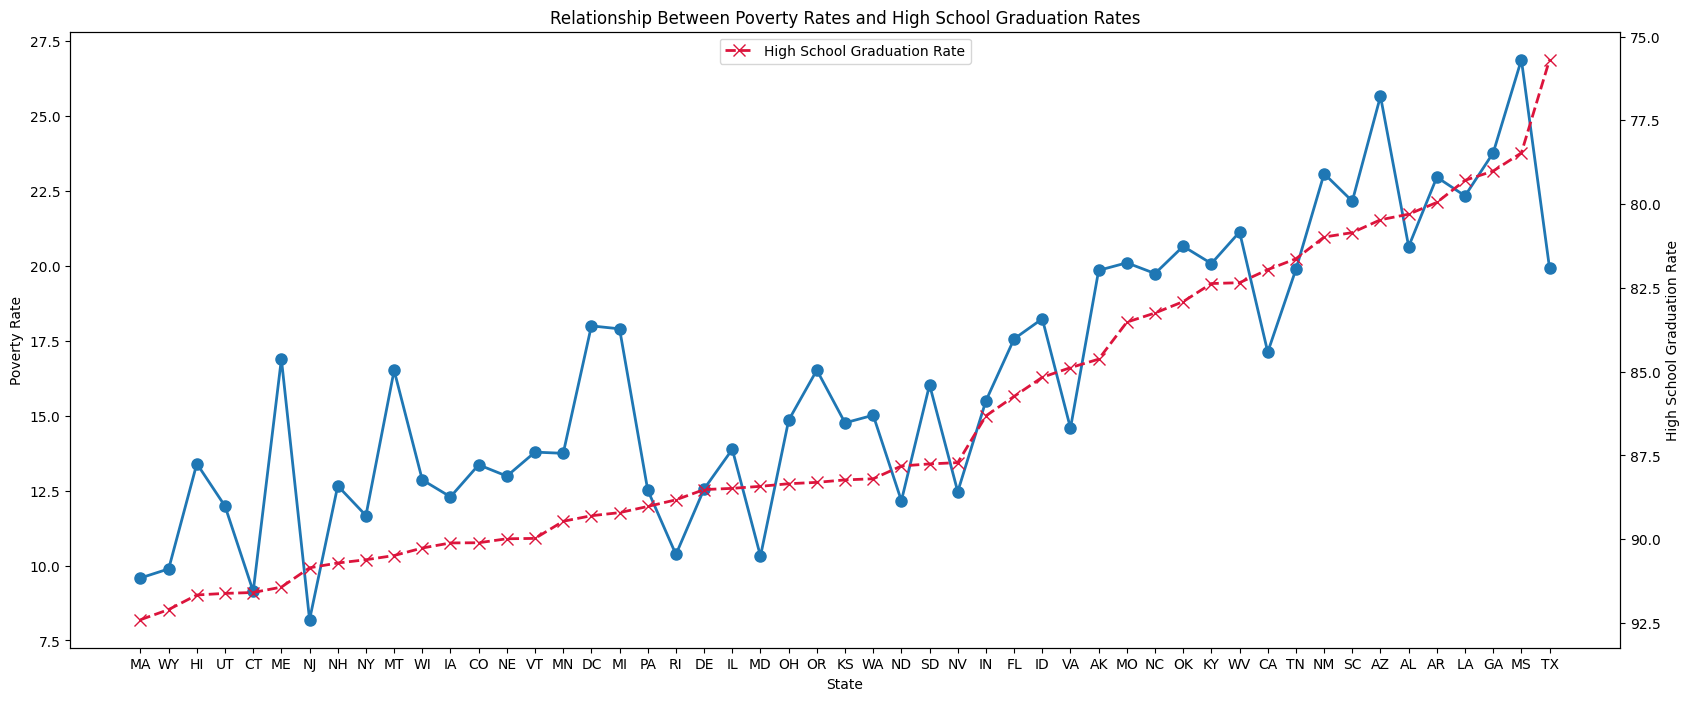

In [19]:
plt.figure(figsize=(20,8))
plt.title('Relationship Between Poverty Rates and High School Graduation Rates')

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(merged_df['Geographic Area'], merged_df['poverty_rate'], label='Poverty Rate', linestyle='-', marker='o', markersize=8, linewidth=2)

ax2.plot(merged_df['Geographic Area'], merged_df['percent_completed_hs'], color='crimson', label='High School Graduation Rate', linestyle='--', marker='x', markersize=8, linewidth=2)

ax.set_ylabel('Poverty Rate')
ax.set_xlabel('State')
ax2.set_ylabel('High School Graduation Rate')

ax2.invert_yaxis()
plt.legend(loc='upper center')
ax.yaxis.grid(False)
ax2.grid(False)
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

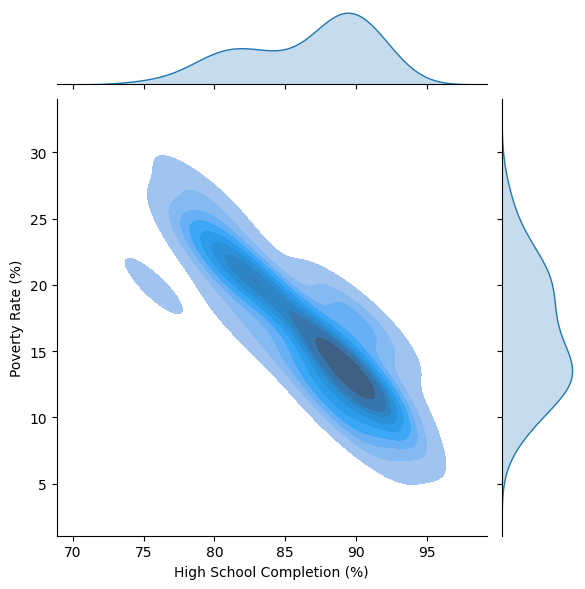

In [20]:
plot = sns.jointplot(data=merged_df, x='percent_completed_hs', y='poverty_rate', kind='kde', fill=True)
plot.set_axis_labels("High School Completion (%)", "Poverty Rate (%)")
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

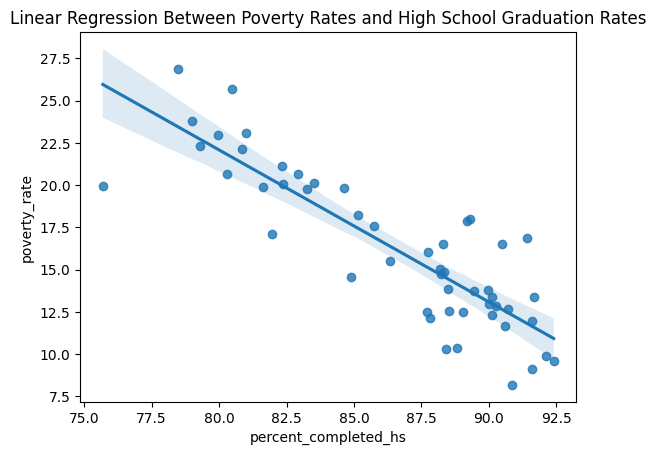

In [21]:
sns.regplot(data=merged_df, x='percent_completed_hs', y='poverty_rate')
plt.title('Linear Regression Between Poverty Rates and High School Graduation Rates')
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [22]:
df_share_race_city.head()
df_share_race_city.dtypes

,0
Geographic area,object
City,object
share_white,object
share_black,object
share_native_american,object
share_asian,object
share_hispanic,object


In [23]:
cols = ['share_white', 'share_black','share_native_american', 'share_asian', 'share_hispanic']
df_share_race_city[cols] = df_share_race_city[cols].apply(pd.to_numeric, errors='coerce')
df_share_race_city.dropna(inplace=True)
racial_makeup = df_share_race_city.groupby('Geographic area')[cols].mean().reset_index()
racial_makeup.rename(columns={'share_white': 'White', 'share_black': 'Black', 'share_native_american': 'Native American', 'share_asian': 'Asian', 'share_hispanic': 'Hispanic'}, inplace=True)
fig = px.bar(racial_makeup,
    x="Geographic area",
    y=['White', 'Black', 'Native American', 'Asian', 'Hispanic'],
    title="Racial Makeup of Each US State",
    labels={"value": "Racial Makeup (%)", 'variable': 'Race', 'Geographic area': 'State'},
    barmode="stack",
)
fig.update_xaxes(tickangle=0)

fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [35]:
people_killed_by_race = df_fatalities['race'].value_counts()

In [39]:
fig = px.pie(people_killed_by_race, values=people_killed_by_race.values, names=people_killed_by_race.index, title='People Killed by Race', hole=0.5)
fig.update_traces(textposition='inside', textinfo='percent+label', labels=['White', 'Black', 'Native American', 'Asian', 'Hispanic'])
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [41]:
people_killed_by_gender = df_fatalities['gender'].value_counts()
people_killed_by_gender

,count
gender,
M,2428
F,107


In [46]:
fig = px.bar(people_killed_by_gender, x=people_killed_by_gender.index, y=people_killed_by_gender.values, title='Total Number of Deaths of Men and Women', labels={'x': 'Gender', 'y': 'Number of Deaths'})
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [63]:
df_manner_of_death = df_fatalities.groupby(['gender', 'manner_of_death']).value_counts().reset_index(name='counts')
df_manner_of_death['gender'].replace({'M': 'Man', 'F': 'Woman'}, inplace=True)
df_manner_of_death

<ipython-input-63-79961c1fe1f9>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,gender,manner_of_death,id,name,date,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,counts
0,Woman,shot,16,Autumn Steele,06/01/15,unarmed,34.00,W,Burlington,IA,False,other,Not fleeing,True,1
1,Woman,shot,20,Jessie Hernandez,26/01/15,vehicle,17.00,H,Denver,CO,False,other,Not fleeing,False,1
2,Woman,shot,111,Tiffany Terry,27/01/15,knife,39.00,W,Omaha,NE,True,attack,Not fleeing,False,1
3,Woman,shot,118,Yuvette Henderson,03/02/15,gun,38.00,B,Emeryville,CA,False,attack,Car,False,1
4,Woman,shot,130,Betty Sexton,17/02/15,gun,43.00,W,Gaston County,NC,False,attack,Not fleeing,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,Man,shot and Tasered,2651,Joshua Barre,09/06/17,knife,29.00,B,Tulsa,OK,True,other,Not fleeing,False,1
2531,Man,shot and Tasered,2656,Johnny Platas,12/06/17,knife,45.00,H,Selma,CA,False,other,Not fleeing,False,1
2532,Man,shot and Tasered,2666,Tommy Le,14/06/17,pen,20.00,A,Burien,WA,False,attack,Not fleeing,False,1
2533,Man,shot and Tasered,2683,TK TK,20/06/17,knife,0.00,Unknown,Las Vegas,NV,False,other,Not fleeing,False,1


In [64]:
fig = px.box(df_manner_of_death, x='gender', y='age', color='manner_of_death')
fig.update_layout(
    title="Manner of Death by Gender and Age",
    xaxis_title="Manner of Death",
    yaxis_title="Age",
    legend_title="Gender",
)
fig.show()

In [77]:
df_fatalities.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,Unknown,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,39.50,M,Unknown,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,Unknown,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True
2534,2815,Dwayne Jeune,31/07/17,shot,knife,32.00,M,B,Brooklyn,NY,True,attack,Not fleeing,False


# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [84]:
people_armed = df_fatalities[df_fatalities['armed'].notna()]
# print(people_armed.head())
unarmed_percentage = ((people_armed['armed'] == 'unarmed').sum() / people_armed['armed'].value_counts().sum()) * 100
people_armed = people_armed['armed'].value_counts()
print(f"Armed people killed: {round(100 - unarmed_percentage)}%")

Armed people killed: 93%


In [85]:
fig = px.bar(people_armed, x=people_armed.index, y=people_armed.values, log_y=True, color=people_armed.values)

fig.update_layout(
    title="Type of Weapon Carried",
    xaxis_title="Weapon",
    yaxis_title="Count",
)

fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [90]:
# df_fatalities.head()
age_under_25 = df_fatalities[df_fatalities['age'] < 25]
percentage_under_25 = (len(age_under_25) / len(df_fatalities)) * 100
print(f"Percentage of people killed under 25 years old: {round(percentage_under_25)}%")

Percentage of people killed under 25 years old: 18%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

In [100]:
people_killed_by_age = df_fatalities.groupby('age').size().reset_index(name='counts')[1:]
df_fatalities.dropna(inplace=True)
people_killed_by_age

,age,counts
1,6.00,1
2,12.00,1
3,13.00,1
4,14.00,1
5,15.00,8
...,...,...
96,80.00,1
97,82.00,2
98,83.00,2
99,86.00,2


In [101]:
fig = px.histogram(people_killed_by_age, x='age', nbins=20, title='Distribution of Ages of People Killed by Police',)
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

Text(0.5, 1.0, 'Distribution of Ages of People Killed by Police by Race')

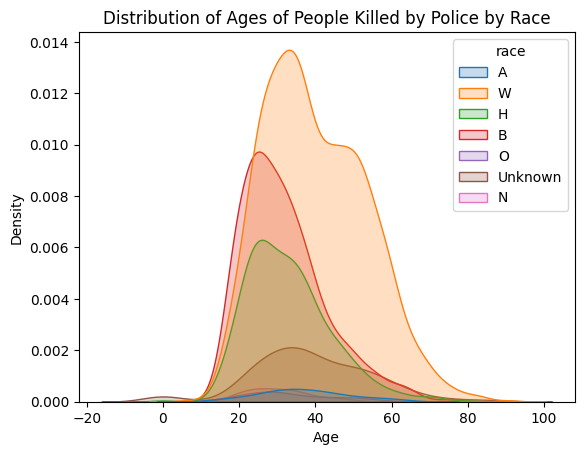

In [108]:
fig = sns.kdeplot(data=df_fatalities, x='age', hue='race', fill=True)
fig.set_xlabel('Age')
fig.set_ylabel('Density')
fig.set_title('Distribution of Ages of People Killed by Police by Race')

# Race of People Killed

Create a chart that shows the total number of people killed by race.

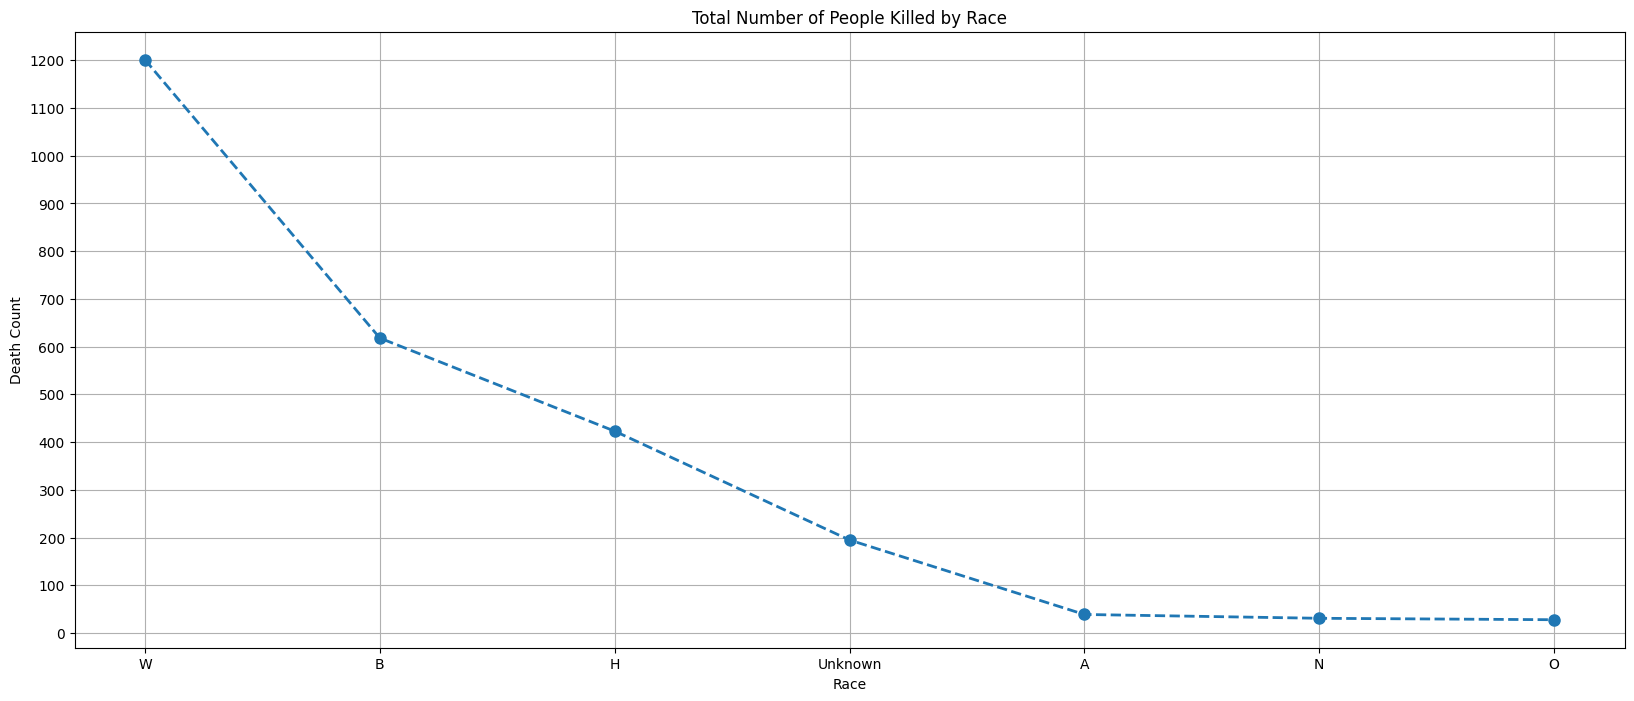

In [118]:
killed_by_race = df_fatalities[df_fatalities['race'].notna()]
killed_by_race = killed_by_race['race'].value_counts()
plt.figure(figsize=(20, 8))
plt.plot(killed_by_race, linestyle='--', marker='o', markersize=8, linewidth=2)
plt.xlabel("Race")
plt.ylabel("Death Count")
plt.title("Total Number of People Killed by Race")
plt.grid(True)
plt.yticks(range(0, killed_by_race.max(), 100))
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [124]:
people_with_mental_illness = df_fatalities[df_fatalities['signs_of_mental_illness'] == True]
# people_with_mental_illness.value_counts().sum()
percentage_with_mental_illness = (len(people_with_mental_illness) / len(df_fatalities)) * 100
print(f"Percentage of people killed by police with a mental illness: {round(percentage_with_mental_illness)}%")

Percentage of people killed by police with a mental illness: 25%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [127]:
most_killing_citywise = df_fatalities.groupby('city').size().sort_values(ascending=False).head(10)
most_killing_citywise

,0
city,
Los Angeles,39
Phoenix,31
Houston,27
Chicago,25
Las Vegas,21
San Antonio,20
Columbus,19
Miami,18
Austin,18


In [128]:
fig = px.bar(most_killing_citywise, x=most_killing_citywise.index, y=most_killing_citywise.values, title='Top 10 Cities with the Most Police Killings', labels={'x': 'City', 'y': 'Number of Police Killings'})
fig.show()


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [142]:
people_killed_by_race_citywise = df_fatalities.groupby(['city', 'race']).size().reset_index(name='counts')

In [151]:
# Step 1: Create a DataFrame for the top 10 cities with the most killings
most_killing_citywise = df_fatalities.groupby('city').size().sort_values(ascending=False).head(10).reset_index(name='total_killings')

# Step 2: Group data by city and race, and count occurrences
people_killed_by_race_citywise = df_fatalities.groupby(['city', 'race']).size().reset_index(name='counts')

# Step 3: Merge the two DataFrames on 'city'
city_share = pd.merge(people_killed_by_race_citywise, most_killing_citywise, on='city')

# Step 4: Calculate the share of each race in each city
city_share['share'] = city_share['counts'] / city_share['total_killings']

# Step 5: Display the resulting DataFrame
print(city_share)

           city     race  counts  total_killings  share
0        Austin        B       3              18   0.17
1        Austin        H       2              18   0.11
2        Austin        W      13              18   0.72
3       Chicago        B      21              25   0.84
4       Chicago        H       1              25   0.04
5       Chicago  Unknown       1              25   0.04
6       Chicago        W       2              25   0.08
7      Columbus        B      11              19   0.58
8      Columbus        O       1              19   0.05
9      Columbus  Unknown       1              19   0.05
10     Columbus        W       6              19   0.32
11      Houston        A       1              27   0.04
12      Houston        B      15              27   0.56
13      Houston        H       6              27   0.22
14      Houston        N       1              27   0.04
15      Houston  Unknown       1              27   0.04
16      Houston        W       3              27

In [152]:
pivot_data = city_share.pivot(index='city', columns='race', values='share')
pivot_data

race,A,B,H,N,O,Unknown,W
city,,,,,,,
Austin,NaN,0.17,0.11,NaN,NaN,NaN,0.72
Chicago,NaN,0.84,0.04,NaN,NaN,0.04,0.08
Columbus,NaN,0.58,NaN,NaN,0.05,0.05,0.32
Houston,0.04,0.56,0.22,0.04,NaN,0.04,0.11
Las Vegas,NaN,0.14,0.24,NaN,NaN,0.19,0.43
Los Angeles,0.03,0.26,0.49,NaN,NaN,0.08,0.15
Miami,NaN,0.44,0.33,NaN,NaN,0.06,0.17
Phoenix,NaN,0.06,0.35,0.10,NaN,0.10,0.39
San Antonio,NaN,0.15,0.60,NaN,NaN,0.10,0.15


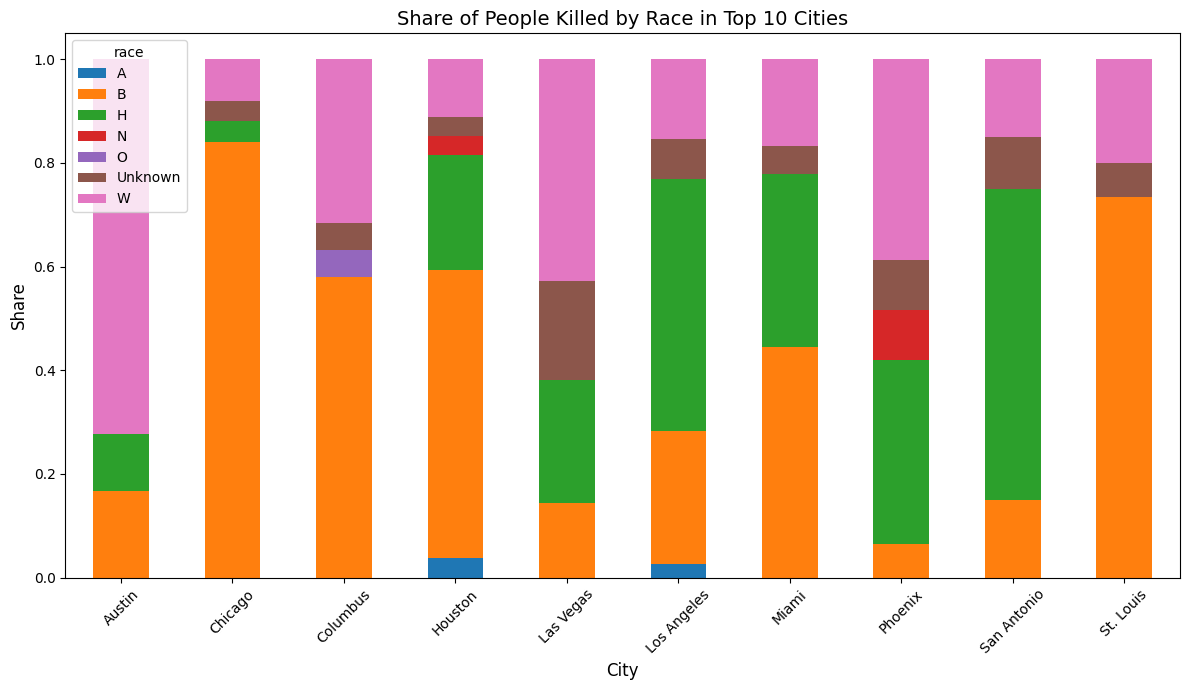

In [155]:
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Share of People Killed by Race in Top 10 Cities', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Share', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [162]:
people_killed_statewise = df_fatalities.groupby('state')['id'].count().reset_index(name='count')
fig = px.choropleth(people_killed_statewise, locations='state', color='count', locationmode="USA-states", scope="usa", title='Police Killings by US State', color_continuous_scale='Reds')
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [163]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

<ipython-input-163-ea1695318982>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [164]:
deaths_over_time = df_fatalities.groupby('date').size().reset_index(name='count').sort_values('date')
deaths_over_time['year'] = deaths_over_time['date'].dt.year
deaths_over_time['month'] = deaths_over_time['date'].dt.month
deaths_over_time = deaths_over_time.groupby(['year', 'month'])['count'].sum().reset_index()

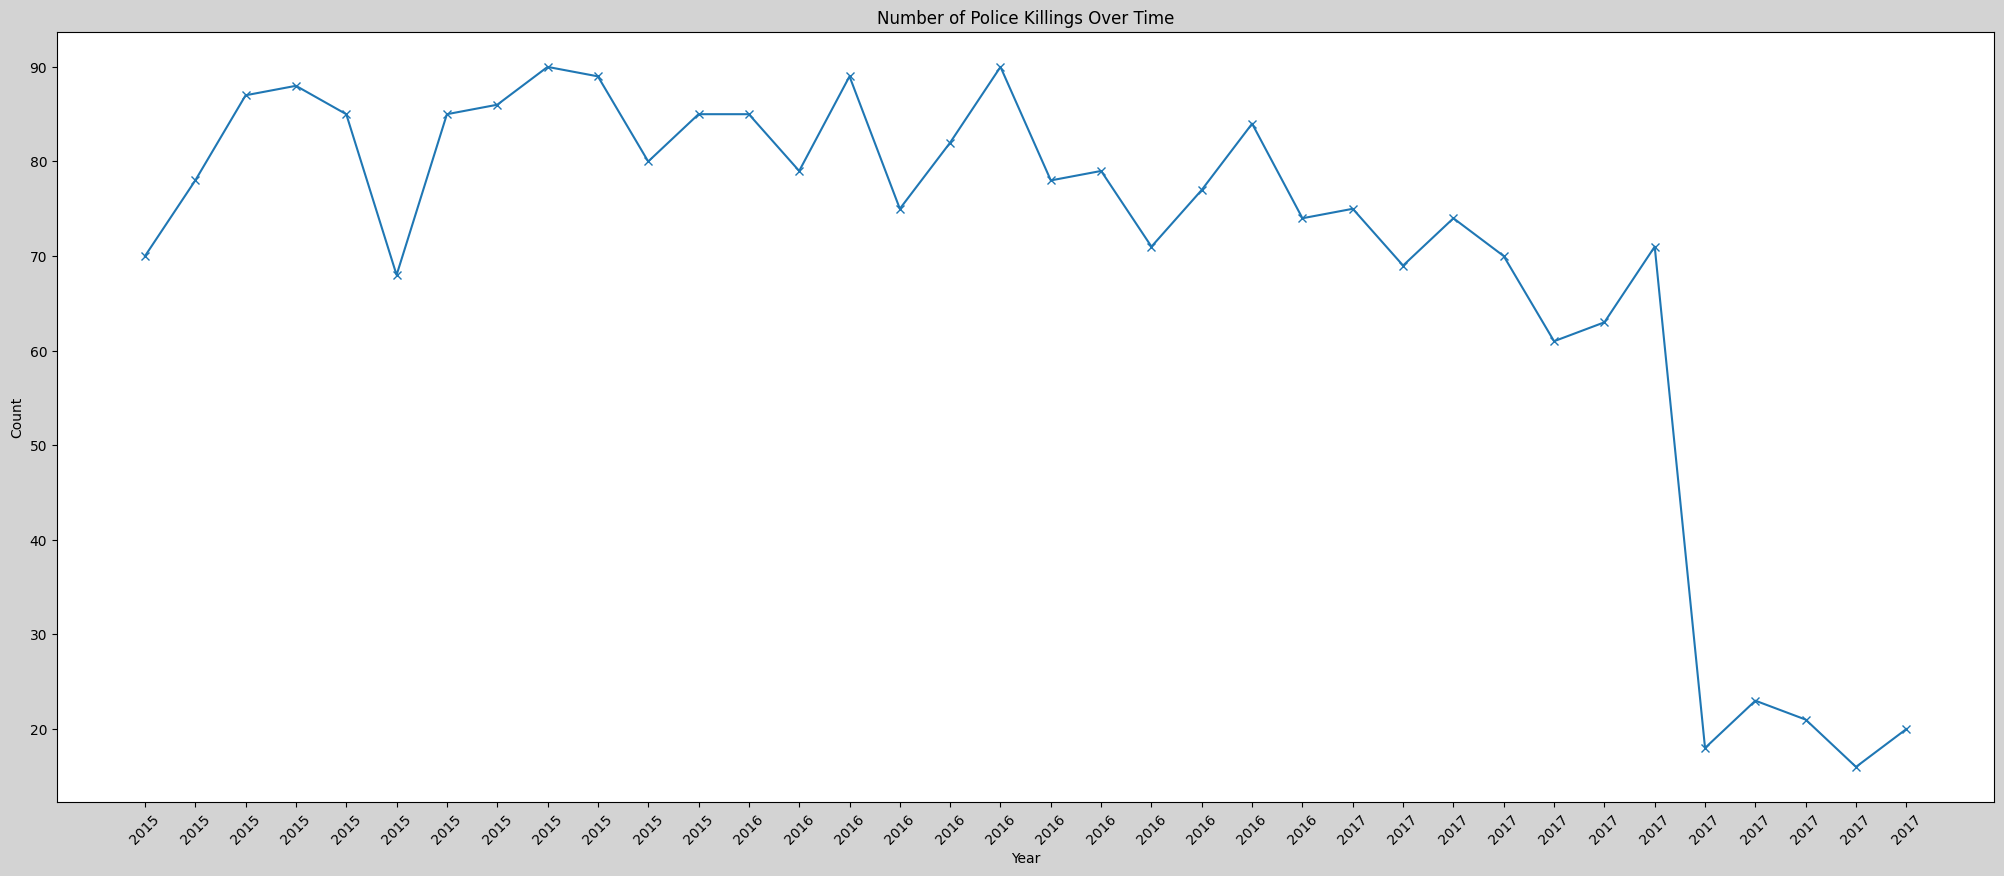

In [169]:
plt.figure(figsize=(25, 10), facecolor='lightgray')

plt.plot(deaths_over_time.index, deaths_over_time['count'], marker='x', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Police Killings Over Time')

plt.xticks(deaths_over_time.index, deaths_over_time.year, rotation=45)

plt.show()


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).